<a href="https://colab.research.google.com/github/narmadhaprasanth/FirstFFNeuralNetwork/blob/master/pytorch_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

#Dataloading

http://www.cs.toronto.edu/~kriz/cifar.html

torchvision is used to do computer vision tasks with pytorch

In [2]:
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10('./data', 
                                        download=True,
                                        train=True,
                                        transform=transforms.ToTensor())

  0%|          | 0/170498071 [00:00<?, ?it/s]

170500096it [00:04, 41674292.54it/s]                               


In [0]:
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

In [0]:
trainloader = torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True)

In [5]:
dataiter = iter(trainloader) #dataiter is an iterator that iterates over trainloader
images, labels = dataiter.next()

print(images.shape)

print(images[0].shape)
print(labels[0].item())


torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
5


#Visualise Data

In [6]:
img = images[0]
print(type(images))


<class 'torch.Tensor'>


In [7]:
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [8]:
npimg = np.transpose(npimg,(1,2,0))
print(npimg.shape)

(32, 32, 3)


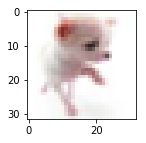

In [9]:
plt.figure(figsize=(2,2))
plt.imshow(npimg)
plt.show()

In [0]:
def imshow(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

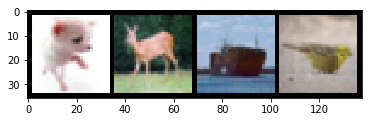

dog deer ship bird


In [11]:
imshow(torchvision.utils.make_grid(images))
print(' ' .join(classes[labels[j]] for j in range(4)))

#Single Convolutional Layer

In [0]:
import torch.nn as nn

class FirstCNN(nn.Module):
  
  def __init__(self):
    super(FirstCNN,self).__init__()
    self.conv1 = nn.Conv2d(3,16,3, padding=(1,1), stride=(2,2)) #no of channels in each image, no of kernels/no of output channel, kernel dimension
    
  def forward(self, x):
    x = self.conv1(x)
    return x

In [0]:
net = FirstCNN()

In [14]:
out = net(images)
out.shape #4 - number of inputs, 16-no of output channels, 30,30 - dimension of the image

torch.Size([4, 16, 16, 16])

In [15]:
for param in net.parameters():
  print(param.shape) #weights and bias

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [16]:
out1 = out[0,0,:,:].detach().numpy()
print(out1.shape)

(16, 16)


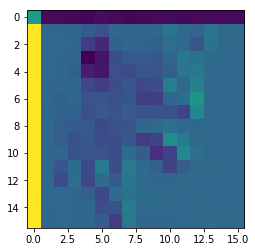

In [17]:
plt.imshow(out[0,0,:,:].detach().numpy())
plt.show()

#Deep CNN

In [0]:
class FirstCNN_v2(nn.Module):
  
  def __init__(self):
    super(FirstCNN_v2, self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3,8,3), #(N,3,32,32) -> (N,8,30,30)
        nn.Conv2d(8,16,3)) #(N,8,30,30) -> (N,16,28,28)
    
  def forward(self, x):
    x = self.model(x)
    return x

In [19]:
net = FirstCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

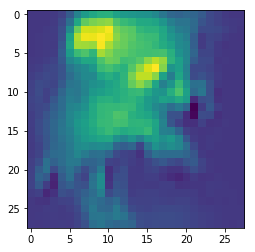

In [20]:
plt.imshow(out[0,0,:,:].detach().numpy())
plt.show()

In [0]:
class FirstCNN_v3(nn.Module):
  
  def __init__(self):
    super(FirstCNN_v3, self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3,6,5), #(N,3,32,32) - > (N,6,28,28)
        nn.AvgPool2d(2,stride=2), #(N,6,28,28) -> (N,6,14,14)
        nn.Conv2d(6,16,5), #(N,6,14,14) -> (N,16,10,10)
        nn.AvgPool2d(2,stride=2)) #(N,16,10,10) -> (N,16,5,5)
    
  def forward(self, x):
    x = self.model(x)
    return x

In [22]:
net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

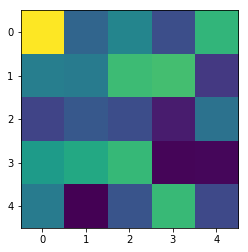

In [23]:
plt.imshow(out[0,0,:,:].detach().numpy())
plt.show()


#LeNet

In [0]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet,self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3,6,5), #(N,3,32,32) - >(N,5,28,28)
        nn.Tanh(),
        nn.AvgPool2d(2,stride=2), #(N,5,28,28) -> (N,5,14,14)
        nn.Conv2d(6,16,5), #(N,6,14,14) -> (N,16, 10,10)
        nn.Tanh(),
        nn.AvgPool2d(2,stride=2)) #(N,16, 10,10) -> (N,16,5,5)
    
    self.fc_model = nn.Sequential(
        nn.Linear(400,120),
        nn.Tanh(),
        nn.Linear(120,84),
        nn.Tanh(),
        nn.Linear(84,10))
    
  def forward(self,x):
    #print(x.shape)
    x = self.cnn_model(x)
    #print(x.shape)
    x = x.view(x.size(0),-1) #flattening of tensor,where first index remains same and all other indices are collapsed
    #print(x.shape)
    x= self.fc_model(x)
    #print(x.shape)
    return x

In [0]:
net = LeNet()
out = net(images)


In [26]:
print(out)

tensor([[ 0.1545,  0.0574, -0.0535, -0.1168, -0.0921,  0.1312,  0.0770,  0.1034,
          0.0950, -0.0863],
        [ 0.1718,  0.0699, -0.0934, -0.1022, -0.0713,  0.0809,  0.0614,  0.0792,
          0.0701, -0.0607],
        [ 0.1570,  0.0556, -0.0582, -0.1126, -0.0814,  0.1215,  0.0576,  0.0625,
          0.0966, -0.1053],
        [ 0.1512,  0.0542, -0.0657, -0.1263, -0.0872,  0.1339,  0.0682,  0.0793,
          0.0964, -0.0969]], grad_fn=<AddmmBackward>)


In [27]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([0, 0, 0, 0])


#Training LeNet

In [0]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet,self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3,6,5), #(N,3,32,32) - >(N,5,28,28)
        nn.Tanh(),
        nn.AvgPool2d(2,stride=2), #(N,5,28,28) -> (N,5,14,14)
        nn.Conv2d(6,16,5), #(N,6,14,14) -> (N,16, 10,10)
        nn.Tanh(),
        nn.AvgPool2d(2,stride=2)) #(N,16, 10,10) -> (N,16,5,5)
    
    self.fc_model = nn.Sequential(
        nn.Linear(400,120),
        nn.Tanh(),
        nn.Linear(120,84),
        nn.Tanh(),
        nn.Linear(84,10))
    
  def forward(self,x):
    #print(x.shape)
    x = self.cnn_model(x)
    #print(x.shape)
    x = x.view(x.size(0),-1) #flattening of tensor,where first index remains same and all other indices are collapsed
    #print(x.shape)
    x= self.fc_model(x)
    #print(x.shape)
    return x

In [29]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
def evaluation(dataloader):
  total, correct = 0,0
  for data in dataloader:
    inputs, labels = data
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
    
  return 100 * correct/total
    

In [0]:
net = LeNet()

In [0]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch:0/16, Test accuracy:38.65, Train accuracy:38.90
Epoch:1/16, Test accuracy:43.81, Train accuracy:44.20
Epoch:2/16, Test accuracy:47.25, Train accuracy:47.64
Epoch:3/16, Test accuracy:49.68, Train accuracy:50.89
Epoch:4/16, Test accuracy:50.93, Train accuracy:53.11
Epoch:5/16, Test accuracy:52.44, Train accuracy:54.98
Epoch:6/16, Test accuracy:53.05, Train accuracy:56.45
Epoch:7/16, Test accuracy:53.54, Train accuracy:57.73
Epoch:8/16, Test accuracy:54.57, Train accuracy:59.18
Epoch:9/16, Test accuracy:54.87, Train accuracy:60.79
Epoch:10/16, Test accuracy:54.07, Train accuracy:60.31
Epoch:11/16, Test accuracy:55.19, Train accuracy:62.61
Epoch:12/16, Test accuracy:55.05, Train accuracy:62.74
Epoch:13/16, Test accuracy:55.91, Train accuracy:64.32
Epoch:14/16, Test accuracy:55.24, Train accuracy:64.00
Epoch:15/16, Test accuracy:55.14, Train accuracy:65.57


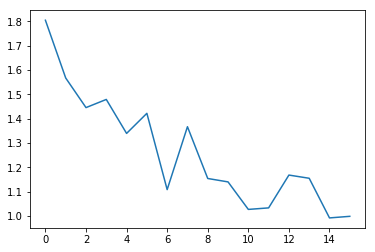

CPU times: user 8min 47s, sys: 12.5 s, total: 8min 59s
Wall time: 9min


In [69]:
%%time
loss_arr = []
loss_epoch_arr =  []
max_epochs = 16

for epoch in range(max_epochs):
  
  for i,data in enumerate(trainloader, 0):
    
    inputs, labels = data
    
    opt.zero_grad()
    
    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
    
    loss_arr.append(loss.item())
    
  loss_epoch_arr.append(loss.item())
  
  print('Epoch:%d/%d, Test accuracy:%0.2f, Train accuracy:%0.2f' %(epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
  
plt.plot(loss_epoch_arr)
plt.show()

#Move to GPU

In [33]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [0]:
def evaluation(dataloader):
  total, correct = 0,0
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
    
  return 100 * correct/total
    

In [0]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch:0/16, Test accuracy:39.13, Train accuracy:38.75
Epoch:1/16, Test accuracy:42.58, Train accuracy:42.69
Epoch:2/16, Test accuracy:46.03, Train accuracy:47.09
Epoch:3/16, Test accuracy:47.40, Train accuracy:48.81
Epoch:4/16, Test accuracy:50.04, Train accuracy:52.23
Epoch:5/16, Test accuracy:50.88, Train accuracy:53.71
Epoch:6/16, Test accuracy:52.60, Train accuracy:56.10
Epoch:7/16, Test accuracy:53.27, Train accuracy:57.12
Epoch:8/16, Test accuracy:53.78, Train accuracy:59.01
Epoch:9/16, Test accuracy:53.55, Train accuracy:58.72
Epoch:10/16, Test accuracy:55.83, Train accuracy:61.43
Epoch:11/16, Test accuracy:55.76, Train accuracy:62.75
Epoch:12/16, Test accuracy:55.73, Train accuracy:63.62
Epoch:13/16, Test accuracy:54.85, Train accuracy:62.97
Epoch:14/16, Test accuracy:55.87, Train accuracy:65.18
Epoch:15/16, Test accuracy:56.04, Train accuracy:66.09


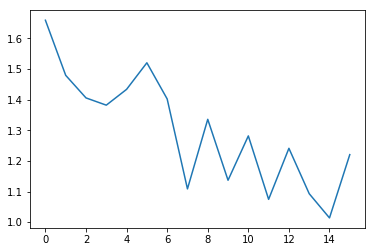

CPU times: user 3min 9s, sys: 4.64 s, total: 3min 14s
Wall time: 3min 14s


In [36]:
%%time
loss_arr = []
loss_epoch_arr =  []
max_epochs = 16

for epoch in range(max_epochs):
  
  for i,data in enumerate(trainloader, 0):
    
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    
    opt.zero_grad()
    
    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
    
    loss_arr.append(loss.item())
    
  loss_epoch_arr.append(loss.item())
  
  print('Epoch:%d/%d, Test accuracy:%0.2f, Train accuracy:%0.2f' %(epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
  
plt.plot(loss_epoch_arr)
plt.show()

#basic Visualization

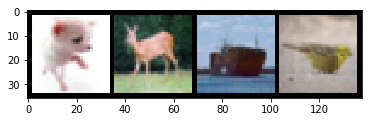

In [37]:
imshow(torchvision.utils.make_grid(images))

In [0]:
net = net.to('cpu')

In [45]:
out = net(images)
print(out.shape)

torch.Size([4, 10])


In [48]:
out = net.cnn_model[0](images)
out.shape

torch.Size([4, 6, 28, 28])

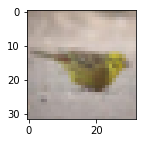

In [49]:
image_id = 3
plt.figure(figsize=(2,2))
imshow(images[image_id,])

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


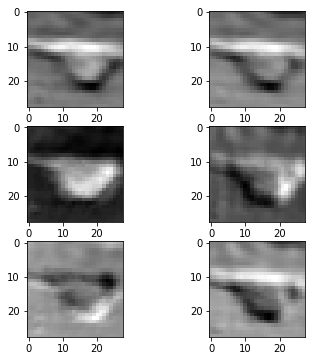

In [50]:
plt.figure(figsize=(6,6))
plt.subplot(321)
for i in range(6):
  ax1 = plt.subplot(3,2,i+1)
  plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap='binary')
plt.show()